In [1]:
# set work dir
import os
os.chdir("..")

In [2]:
from matplotlib import pyplot as plt
import scienceplots
import numpy as np
import pandas as pd
from types import SimpleNamespace
plt.style.reload_library()
plt.style.use("science")

In [3]:
def saveBar(data_params, task_params, train_params, methods):
    elapseds = {mthd:[] for mthd in methods}
    runtime = getRunTime(3, 1, 100, data_params, task_params, train_params)
    for mthd in methods:
        elapseds[mthd].append(runtime[mthd])
    runtime = getRunTime(6, 2, 100, data_params, task_params, train_params)
    for mthd in methods:
        elapseds[mthd].append(runtime[mthd])
    runtime = getRunTime(9, 3, 100, data_params, task_params, train_params)
    for mthd in methods:
        elapseds[mthd].append(runtime[mthd])
    runtime = getRunTime(3, 1, 1000, data_params, task_params, train_params)
    for mthd in methods:
        elapseds[mthd].append(runtime[mthd])
    runtime = getRunTime(6, 2, 1000, data_params, task_params, train_params)
    for mthd in methods:
        elapseds[mthd].append(runtime[mthd])
    runtime = getRunTime(9, 3, 1000, data_params, task_params, train_params)
    for mthd in methods:
        elapseds[mthd].append(runtime[mthd])
    plotTimeBar(elapseds, methods, train_params)

In [4]:
def getRunTime(n_sp, n_tsp, data, data_params, task_params, train_params):
    task_args["n_sp"] = n_sp
    task_args["n_tsp"] = n_tsp
    data_args["data"] = data
    # load data
    runtime = {}
    res_dir = getDir(data_params, task_params, train_params)
    df = pd.read_csv(res_dir + "/res.csv")
    for i in df.index:
        mthd = df.at[i,"Method"]
        if mthd in methods:
            runtime[mthd] = (df.at[i,"Elapsed"] + df.at[i,"Elapsed Val"]) / 60
    return runtime

In [5]:
def getDir(data_params, task_params, train_params):
    """
    Get dir to save figure and result
    """
    n = data_params["data"] # number of data
    p = data_params["feat"] # size of feature
    deg = data_params["deg"] # polynomial degree
    n_sp = task_params["n_sp"] # number of sp tasks
    n_tsp = task_params["n_tsp"] # number of tsp tasks
    algo = train_params["algo"] # training algo
    # results
    res_dir = "./res/{}sp{}tsp/{}/n{}p{}deg{}".format(n_sp, n_tsp, algo, n, p, deg)
    os.makedirs(res_dir, exist_ok=True)
    return res_dir

In [6]:
def plotTimeBar(elapseds, methods, train_params):
    fig = plt.figure(figsize=(12, 6))
    # color
    colors = {"mse": "#332288", "separated":"#88ccee", "separated+mse":"#44aa99",
              "comb": "#117733", "comb+mse": "#999933", "gradnorm": "#ddcc77",
              "gradnorm+mse":"#cc6677", "scheduled": "#882255"}
    # plot
    x = np.array(range(6))
    bar1 = plt.bar(x-0.2, height=elapseds[methods[0]], width=0.2, edgecolor="w",
                   color=colors[methods[0]], label=methods[0])
    bar2 = plt.bar(x, height=elapseds[methods[1]], width=0.2, edgecolor="w",
                   color=colors[methods[1]], label=methods[1])
    bar3 = plt.bar(x+0.2, height=elapseds[methods[2]], width=0.2, edgecolor="w",
                   color=colors[methods[2]], label=methods[2])
    # vertical line
    plt.axvline(x=2.5, color="k", linestyle="--", linewidth=1, alpha=0.75)
    # tick & labels
    labels = ["3 SP, 1 TSP", "6 SP, 2 TSP", "9 SP, 3 TSP",
              "3 SP, 1 TSP", "6 SP, 2 TSP", "9 SP, 3 TSP"]
    fig.text(0.32, 0.035, "Data Size 100", ha="center", va="center", fontsize=20)
    fig.text(0.70, 0.035, "Data Size 1000", ha="center", va="center", fontsize=20)
    plt.xticks(ticks=x, labels=labels, fontsize=20)
    plt.ylabel("Runtime for Training (Min)", fontsize=24)
    plt.yticks(fontsize=20)
    plt.ylim(0, 300)
    plt.legend(fontsize=24)
    if train_params["algo"] == "spo":
        title = "Learning from Costs (SPO+)"
    if train_params["algo"] == "pfyl":
        title = "Learning from Solutions (PFYL)"
    plt.title(title, fontsize=28)
    # save
    save_dir = "./res/" + train_params["algo"] + "_time.png"
    fig.savefig(save_dir, dpi=300)
    save_dir = "./res/" + train_params["algo"] + "_time.pdf"
    fig.savefig(save_dir, dpi=300)
    plt.show()

In [7]:
# args
data_args = {
    "node":  30,
    "data":  None,
    "feat":  10,
    "deg":   4,
    "noise": 0.5,
}
task_args = {
    "n_sp":  None,
    "n_tsp": None,
}
train_args = {
    "algo":  None,
}

## SPO+ 

In [8]:
methods = ["separated+mse", "comb+mse", "gradnorm+mse"]

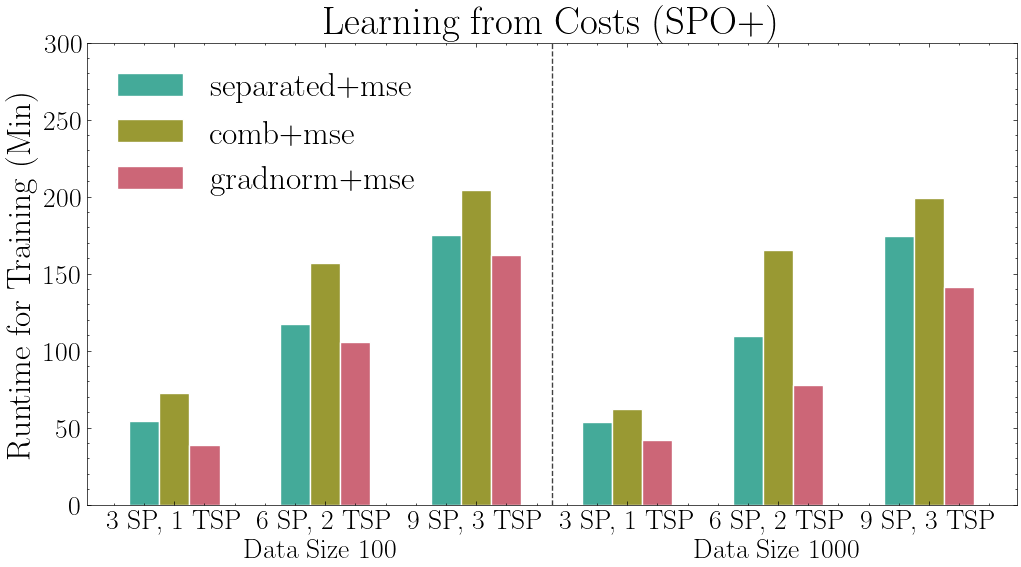

In [9]:
train_args["algo"] = "spo"
saveBar(data_args, task_args, train_args, methods)

## PFYL 

In [10]:
methods = ["separated", "comb", "gradnorm"]

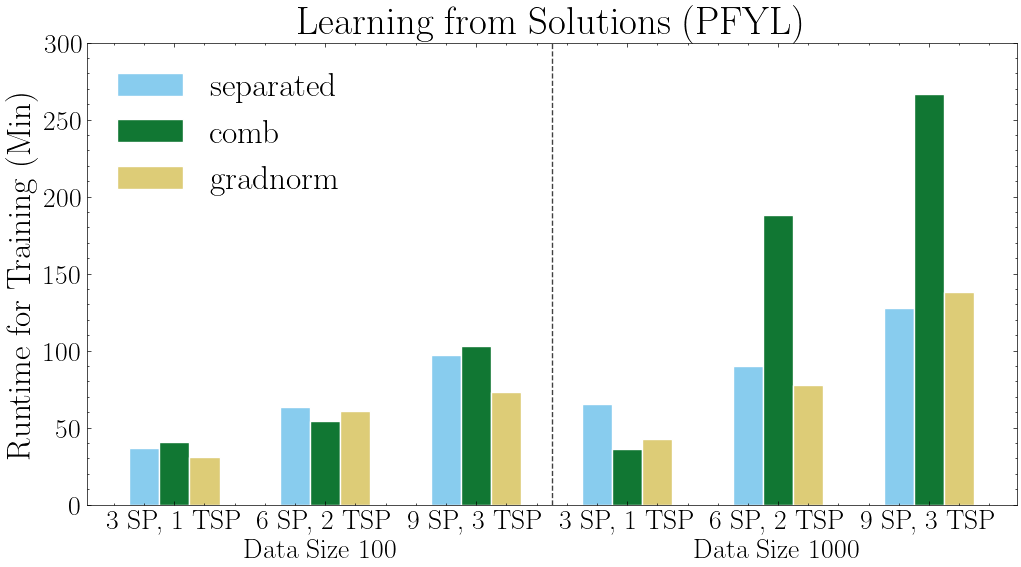

In [11]:
train_args["algo"] = "pfyl"
saveBar(data_args, task_args, train_args, methods)